In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt

In [2]:
data = loadmat('ex5data1.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']

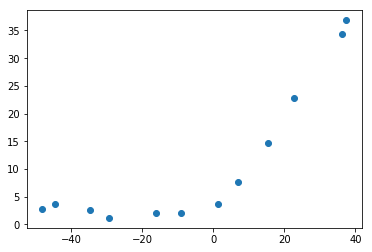

In [3]:
fig, ax = plt.subplots()
ax.scatter(X, y)
plt.show()

In [4]:
def cost(theta, X, y):
    return np.sum(np.power(X@theta - y.flatten(), 2)) / (2 * len(X))

In [5]:
def costReg(theta, X, y, l = 1):
    return cost(theta, X, y) + l * np.sum(theta[1:] @ theta[1:]) / (2 * len(X)) # 第0项不Reg

In [6]:
X = np.insert(X, 0, 1, axis = 1)

In [7]:
theta = np.array([1, 1])
costReg(theta, X, y)

303.9931922202643

In [8]:
def gradient(theta, X, y):
    return ((X@theta - y.flatten()) @ X) / len(X)

In [9]:
def gradientReg(theta, X, y, l = 1):
    return gradient(theta, X, y) + l / len(X) * theta[1:]

In [10]:
gradientReg(theta, X, y)

array([-15.21968234, 598.25074417])

In [11]:
def fitLinearReg(X, y, l):
    theta = np.zeros(X.shape[1])
    res = opt.minimize(fun=costReg, x0=theta, args=(X, y, l), method='TNC', jac=gradientReg)
    return res.x

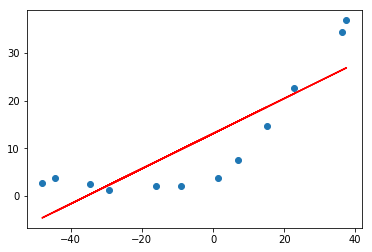

In [12]:
thetaFinal = fitLinearReg(X, y, 0)
fig, ax = plt.subplots()
ax.scatter(data['X'], y)
ax.plot(data['X'], X@thetaFinal, c='r')
plt.show()

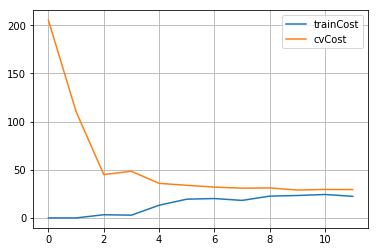

In [13]:
def plotLearningCurve(X, y, Xval, yval, l):
    trainCost, cvCost = [], []
    for i in range(len(X)):
        thetaFinal = fitLinearReg(X[:i+1], y[:i+1], l)
        trainCost.append(costReg(thetaFinal, X[:i+1], y[:i+1], l))
        cvCost.append(costReg(thetaFinal, Xval, yval, l))
    
    fig, ax = plt.subplots()
    ax.plot(range(len(X)), trainCost, label = 'trainCost')
    ax.plot(range(len(X)), cvCost, label = 'cvCost')
    plt.legend()
    plt.grid(True)
    plt.show()
Xval = np.insert(Xval, 0, 1, axis = 1)
plotLearningCurve(X, y, Xval, yval, 0)